In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("C:\multi_final\서울특별시 공공자전거 이용정보(시간대별)_2301.csv", encoding = 'cp949')

data

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hyeon\AppData\Local\Temp\ipykernel_3064\2904829221.py:5: SyntaxWarning: invalid escape sequence '\m'
  data = pd.read_csv("C:\multi_final\서울특별시 공공자전거 이용정보(시간대별)_2301.csv", encoding = 'cp949')


,RENT_DT,RENT_HR\t,RENT_ID\t,RENT_NM\t,RENT_TYPE\t,GENDER_CD,AGE_TYPE\t,USE_CNT\t,EXER_AMT,CARBON_AMT,MOVE_METER,MOVE_TIME\t
0,2023-01-01,0,433,433. 을지로입구역 2번출구,정기권,NaN,~10대,1,44.24,0.42,1831.45,8
1,2023-01-01,0,2032,2032. 이수역 11번출구쪽,정기권,NaN,~10대,1,7.11,0.06,276.06,4
2,2023-01-01,0,744,744. 신목동역 2번 출구,정기권,NaN,20대,1,25.05,0.24,1020.46,7
3,2023-01-01,0,1029,1029. 성내어울터,정기권,NaN,20대,1,34.05,0.2,859.74,4
4,2023-01-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,20대,2,141.49,1.31,5675.10,78
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2023-01-20,12,3614,3614. 은마아파트 입구 사거리,정기권,M,40대,1,29.77,0.25,1073.98,7
1048571,2023-01-20,12,4024,4024. 꿈의숲 SK뷰 아파트,정기권,M,40대,1,0,0,0.00,2
1048572,2023-01-20,12,4074,4074. 도봉구육아종합지원센터(창동),정기권,M,40대,1,49.07,0.36,1568.56,41
1048573,2023-01-20,12,4575,4575. 대림동 e편한세상영등포아델포레,정기권,M,40대,1,100.08,0.73,3159.09,73


In [2]:
rent_counts = data['RENT_ID\t'].value_counts()

In [3]:
top_20_stations = rent_counts.head(20)
print(top_20_stations)

RENT_ID\t
2715    3454
1153    2537
2701    2491
230     2369
2728    2306
1210    2253
1911    2091
1961    1987
2177    1967
1906    1958
2102    1952
765     1857
1124    1814
770     1810
785     1788
502     1778
792     1752
589     1738
113     1695
5052    1693
Name: count, dtype: int64


In [4]:
data_map = pd.read_csv("C:\\multi_final\\공공자전거 대여소 정보(23.12월 기준).csv")
data_map

,ID,name,loc1,loc2,lat,long,open_day,lcd_bc,qr_bc,station_type
0,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,15.0,QR
1,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,14.0,QR
2,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,13.0,QR
3,105.0,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,5.0,QR
4,106.0,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,12.0,12.0,QR
...,...,...,...,...,...,...,...,...,...,...
2761,6172.0,가양5단지아파트,강서구,강서구 가양동1481,37.564480,126.854645,2023-11-30,NaN,10.0,QR
2762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import folium

In [6]:

# 상위 20개 대여소 ID (대여 횟수 정보를 기반으로 수정)
top_20_stations_ids = [2715, 1153, 2701, 230, 2728, 1210, 1911, 1961, 2177, 1906, 2102, 765, 1124, 770, 785, 502, 792, 589, 113, 5052]

# 상위 20개 대여소의 정보만 필터링
top_20_stations_info = data_map[data_map['ID'].isin(top_20_stations_ids)]

# 서울의 중심에 맵을 생성합니다. 중심 좌표는 서울 시청 근처입니다.
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 상위 20개 대여소를 맵에 추가
for idx, row in top_20_stations_info.iterrows():
    folium.Marker(
        [row['lat'], row['long']],  # 위도, 경도
        popup=f"ID: {row['ID']}, 이름: {row['name']}",  # 팝업에 표시될 텍스트
    ).add_to(seoul_map)

# 맵을 저장합니다. HTML 파일로 저장되어 웹 브라우저에서 열 수 있습니다.
seoul_map.save('top_20_bike_stations_2.html')


In [7]:
data_01 = pd.read_csv("C:\\multi_final\\23.01.csv", encoding='cp949')
data_01

,date,rent_id,name,hour,count
0,2023-01-01,102,102. 망원역 1번출구 앞,0,15
1,2023-01-01,102,102. 망원역 1번출구 앞,1,14
2,2023-01-01,102,102. 망원역 1번출구 앞,2,12
3,2023-01-01,102,102. 망원역 1번출구 앞,3,12
4,2023-01-01,102,102. 망원역 1번출구 앞,4,12
...,...,...,...,...,...
1048570,2023-01-17,822,822. 이촌1동 마을공원,1,22
1048571,2023-01-17,822,822. 이촌1동 마을공원,2,22
1048572,2023-01-17,822,822. 이촌1동 마을공원,3,22
1048573,2023-01-17,822,822. 이촌1동 마을공원,4,22


In [8]:
# 상위 20개 대여소에 해당하는 데이터만 필터링
filtered_data = data_01[data_01['rent_id'].isin(top_20_stations_ids)]

# 결과 확인
print(filtered_data)

               date  rent_id                name  hour  count
240      2023-01-01      113   113. 홍대입구역 2번출구 앞     0     40
241      2023-01-01      113   113. 홍대입구역 2번출구 앞     1     40
242      2023-01-01      113   113. 홍대입구역 2번출구 앞     2     25
243      2023-01-01      113   113. 홍대입구역 2번출구 앞     3     27
244      2023-01-01      113   113. 홍대입구역 2번출구 앞     4     20
...             ...      ...                 ...   ...    ...
1048012  2023-01-17      792  792.목동트라팰리스 웨스턴에비뉴    19     25
1048013  2023-01-17      792  792.목동트라팰리스 웨스턴에비뉴    20     25
1048014  2023-01-17      792  792.목동트라팰리스 웨스턴에비뉴    21     25
1048015  2023-01-17      792  792.목동트라팰리스 웨스턴에비뉴    22     18
1048016  2023-01-17      792  792.목동트라팰리스 웨스턴에비뉴    23     20

[7872 rows x 5 columns]


In [9]:
usage_by_hour = data_01['hour'].value_counts().sort_index()


In [10]:
# 상위 20개 대여소에 해당하는 데이터만 필터링하고, 날짜가 2023-01-16까지인 데이터만 선택
filtered_data_with_date = data_01[(data_01['rent_id'].isin(top_20_stations_ids)) & (data_01['date'] <= '2023-01-16')]

# 결과 확인
print(filtered_data_with_date)


               date  rent_id               name  hour  count
240      2023-01-01      113  113. 홍대입구역 2번출구 앞     0     40
241      2023-01-01      113  113. 홍대입구역 2번출구 앞     1     40
242      2023-01-01      113  113. 홍대입구역 2번출구 앞     2     25
243      2023-01-01      113  113. 홍대입구역 2번출구 앞     3     27
244      2023-01-01      113  113. 홍대입구역 2번출구 앞     4     20
...             ...      ...                ...   ...    ...
1033228  2023-01-16     5052     5052. 마곡역 7번출구    19      9
1033229  2023-01-16     5052     5052. 마곡역 7번출구    20      5
1033230  2023-01-16     5052     5052. 마곡역 7번출구    21      0
1033231  2023-01-16     5052     5052. 마곡역 7번출구    22      1
1033232  2023-01-16     5052     5052. 마곡역 7번출구    23      0

[7680 rows x 5 columns]


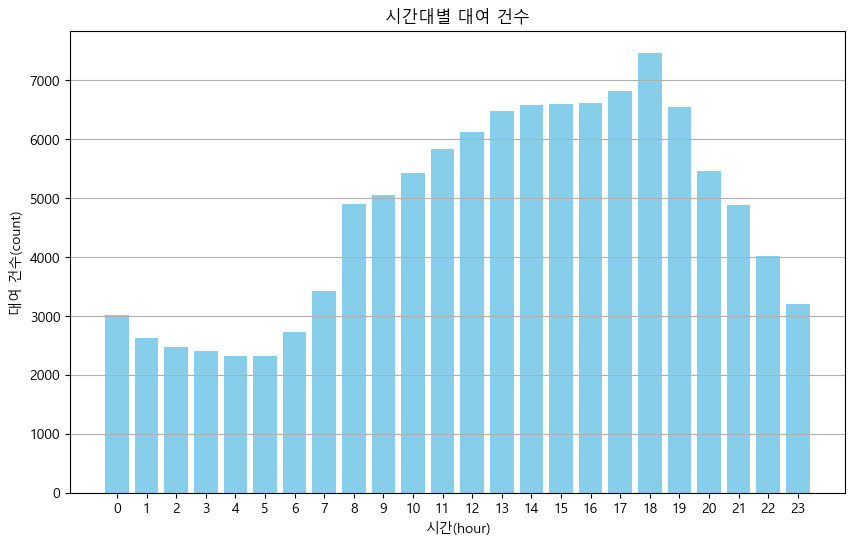

In [12]:
hourly_counts = filtered_data_with_date.groupby('hour')['count'].sum().reset_index()

# 시각화

plt.rc('font', family="Malgun Gothic")


plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(hourly_counts['hour'], hourly_counts['count'], color='skyblue')  # 막대 그래프 생성
plt.title('시간대별 대여 건수')  # 그래프 제목
plt.xlabel('시간(hour)')  # x축 레이블
plt.ylabel('대여 건수(count)')  # y축 레이블
plt.xticks(hourly_counts['hour'])  # x축에 표시될 값들을 시간(hour)으로 설정
plt.grid(axis='y')  # y축 기준으로 그리드 표시
plt.show()